### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial import distance

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# полином первого порядка
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [3]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.000005, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(X_train.shape[1]), 0.0001
weight_evolution, mse_evolution, r2_evolution = [], [], [] # изменения весов и ошибка на валидации
for step in list(range(5000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    r2_evolution.append(r2_score(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()

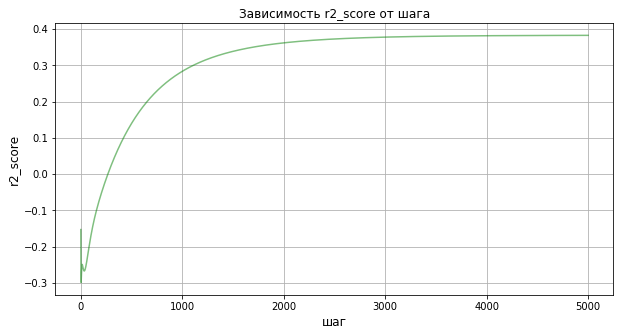

In [4]:
plt.figure(figsize=(10, 5)) 
plt.plot(range(step+1), r2_evolution, 'g', alpha = 0.5)
plt.xlabel('шаг', fontsize=12)
plt.ylabel('r2_score', fontsize=12)
plt.title('Зависимость r2_score от шага', fontsize=12)
plt.grid()
plt.show()

In [5]:
print ('r2_score = %.3g, mse = %.3g' % (r2_evolution[-1], mse_evolution[-1]))
# понадобилось 4000 итераций

r2_score = 0.383, mse = 64.5


In [6]:
##

In [7]:
# полином первого порядка, SGDRegressor - значение r2_score не совпадает со значением, полученным с помощью sgd_regressor.partial_fit
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.000005, fit_intercept=True, random_state=42, n_iter_no_change = 4000)
reg = SGDRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-5.916574682158619

In [8]:
# полином второго порядка, SGDRegressor
X = boston_dataset.data
y = boston_dataset.target
X = np.concatenate((X, X **2), axis = 1)
X.shape
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
reg = SGDRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-3.7299987867205076

In [9]:
# полином третьего порядка, SGDRegressor
X = boston_dataset.data
y = boston_dataset.target
X = np.concatenate((X, X **2, X **3), axis = 1)
X.shape
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
reg = SGDRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-1.1863445010585365

In [10]:
# полином первого порядка, LinearRegression
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

0.49008370107158683

In [11]:
# полином второго порядка, LinearRegression (лучше всего)
X = np.concatenate((X, X **2), axis = 1)
X.shape
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

0.7619957994929665

In [12]:
# полином третьего порядка, LinearRegression
X = np.concatenate((X, X **2, X **3), axis = 1)
X.shape
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_valid)
r2_score(y_pred, y_valid)

-0.5089333543318721

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.